## Imports

In [1]:
import os
import math
import glob
import cv2
from collections import deque
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import cm
from moviepy.editor import VideoFileClip
import time
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
from skimage.feature import hog
from scipy.ndimage.measurements import label
import pickle
%matplotlib inline

## Load Dataset

In [2]:
test_images = np.array([plt.imread(i) for i in glob.glob('./test_images/*.jpg')])

car_images = []
non_car_images = []

for root, dirs, files in os.walk('./dataset/vehicles/'):
    for file in files:
        if file.endswith('.png'):
            car_images.append(os.path.join(root, file))
            
for root, dirs, files in os.walk('./dataset/non-vehicles/'):
    for file in files:
        if file.endswith('.png'):
            non_car_images.append(os.path.join(root, file))

## Basic Summary of Dataset

In [3]:
n_car_images = len(car_images)
n_non_car_images = len(non_car_images)
img_shape = mpimg.imread(car_images[0]).shape
print('No. of car images: ', n_car_images)
print('No of non-car images: ', n_non_car_images)
print('Image shape: ', img_shape)

No. of car images:  9103
No of non-car images:  8968
Image shape:  (64, 64, 3)


### Car Image Examples

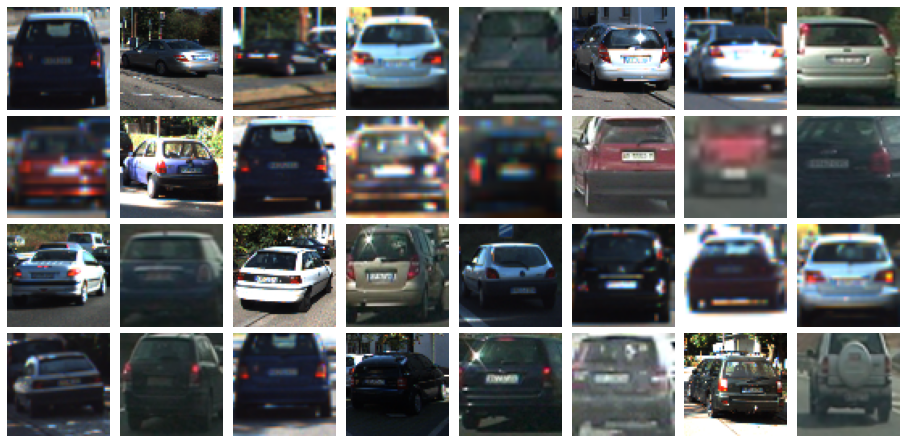

In [4]:
fig, axs = plt.subplots(4,8, figsize=(16, 8))
fig.subplots_adjust(hspace = 0, wspace=.1)
axs = axs.ravel()

for i in np.arange(32):
    img = cv2.imread(car_images[np.random.randint(0,n_car_images)])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    axs[i].imshow(img)
plt.savefig('output_images/car_samples.png')

### Non-car Image Examples

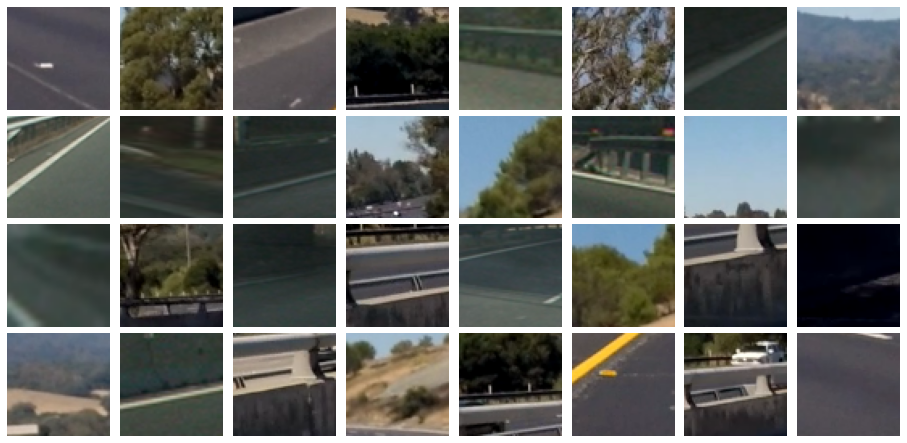

In [5]:
fig, axs = plt.subplots(4,8, figsize=(16, 8))
fig.subplots_adjust(hspace = 0, wspace=.1)
axs = axs.ravel()

for i in np.arange(32):
    img = cv2.imread(non_car_images[np.random.randint(0,n_non_car_images)])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    axs[i].imshow(img)
plt.savefig('output_images/non_car_samples.png')